In [49]:
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.feature_selection import f_classif, SelectFpr, SelectKBest
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv('df_percepcion_genero_familia.csv')

In [3]:
df.dropna(axis = 1, inplace=True)

In [4]:
df['P11_1_3'] = df['P11_1_3'].astype(str)
df['P11_1_18'] = df['P11_1_18'].astype(str)
df['P11_1_2'] = df['P11_1_2'].astype(str)
df['P11_1_13'] = df['P11_1_13'].astype(str)
df['P11_1_4'] = df['P11_1_4'].astype(str)

In [5]:
df['P11_1_3'].unique()

array(['4', '2', '3', '1'], dtype=object)

In [6]:
df['Target1'] = df['P11_1_3'].replace('4', 0)
df['Target1'] = df['Target1'].replace(['1', '2', '3'], 1)

In [7]:
df['Target2'] = df['P11_1_18'].replace('4', 0)
df['Target2'] = df['Target2'].replace(['1', '2', '3'], 1)

In [8]:
df['Target3'] = df['P11_1_2'].replace('4', 0)
df['Target3'] = df['Target3'].replace(['1', '2', '3'], 1)

In [9]:
df['Target4'] = df['P11_1_13'].replace('4', 0)
df['Target4'] = df['Target4'].replace(['1', '2', '3'], 1)

In [10]:
df['Target5'] = df['P11_1_4'].replace('4', 0)
df['Target5'] = df['Target5'].replace(['1', '2', '3'], 1)

In [11]:
df['Target1'].value_counts()

Target1
0    109850
1       277
Name: count, dtype: int64

In [12]:
df['Target2'].value_counts()

Target2
0    110045
1        82
Name: count, dtype: int64

In [13]:
df['Target3'].value_counts()

Target3
0    109068
1      1059
Name: count, dtype: int64

In [14]:
df['Target4'].value_counts()

Target4
0    109728
1       399
Name: count, dtype: int64

In [15]:
df['Target5'].value_counts()

Target5
0    109686
1       441
Name: count, dtype: int64

In [16]:
# Use any() with axis=1 to check for at least one 1 in specific columns
df['Target'] = df[['Target1','Target2', 'Target3', 'Target4', 'Target5']].any(axis=1).astype(int)

In [17]:
df['Target'].value_counts()

Target
0    108762
1      1365
Name: count, dtype: int64

In [18]:
df.drop(['P11_1_3', 'P11_1_18','P11_1_2', 'P11_1_4', 'P11_1_13', 'Target1', 'Target2', 'Target3', 'Target4', 'Target5'], axis=1, inplace=True)

In [19]:
df_0 = df.query('(Target == 0)').sample(n=5000)

In [20]:
df_1 =  df.query('(Target == 1)')

In [21]:
db = pd.concat([df_0, df_1])
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 10417 to 110111
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_VIV      6365 non-null   float64
 1   ID_PER      6365 non-null   object 
 2   UPM         6365 non-null   int64  
 3   VIV_SEL     6365 non-null   int64  
 4   HOGAR       6365 non-null   int64  
 5   N_REN       6365 non-null   int64  
 6   DOMINIO     6365 non-null   object 
 7   CVE_ENT     6365 non-null   int64  
 8   NOM_ENT     6365 non-null   object 
 9   CVE_MUN     6365 non-null   int64  
 10  NOM_MUN     6365 non-null   object 
 11  T_INSTRUM   6365 non-null   object 
 12  POBT        6365 non-null   int64  
 13  POBP        6365 non-null   int64  
 14  POB_E_A     6365 non-null   int64  
 15  POB_L_A     6365 non-null   int64  
 16  POB_E_12M   6365 non-null   int64  
 17  POB_L_12M   6365 non-null   int64  
 18  VTOT_A      6365 non-null   int64  
 19  VTOT_12M    6365 non-null 

In [22]:
# VARIABLES INNECESARIOS
db.drop(['ID_VIV','ID_PER','UPM','VIV_SEL','HOGAR','N_REN','CVE_ENT','NOM_ENT','CVE_MUN','NOM_MUN','POB_E_12M','POB_L_12M','VPSI_A','VPSI_12M','FAC_VIV','FAC_MUJ','ESTRATO','UPM_DIS','EST_DIS','COD_M15','CODIGO','GRA','NOMBRE','P2_11','P2_13','P2_5','P2_6','REN_MUJ_EL','SEXO','P6_1_1','P6_1_3','P6_2_1','P6_1_5','P6_2_2','P6_2_4','P6_2_3'], axis=1, inplace=True)
db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6365 entries, 10417 to 110111
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DOMINIO    6365 non-null   object 
 1   T_INSTRUM  6365 non-null   object 
 2   POBT       6365 non-null   int64  
 3   POBP       6365 non-null   int64  
 4   POB_E_A    6365 non-null   int64  
 5   POB_L_A    6365 non-null   int64  
 6   VTOT_A     6365 non-null   int64  
 7   VTOT_12M   6365 non-null   int64  
 8   VFIS_A     6365 non-null   int64  
 9   VFIS_12M   6365 non-null   int64  
 10  VECO_A     6365 non-null   int64  
 11  VECO_12M   6365 non-null   int64  
 12  VSEX_A     6365 non-null   int64  
 13  VSEX_12M   6365 non-null   int64  
 14  VCOM_A     6365 non-null   int64  
 15  VCOM_12M   6365 non-null   int64  
 16  VFAM       6365 non-null   int64  
 17  EDAD       6365 non-null   int64  
 18  NIV        6365 non-null   float64
 19  P2_10      6365 non-null   float64
 20  P2_16  

In [23]:
db['Target'].value_counts()

Target
0    5000
1    1365
Name: count, dtype: int64

In [24]:
X = db.drop(['Target'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = db['Target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.90, random_state = 1234)

In [26]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
clf.fit(X_train, y_train)
y_clas = clf.predict(X_test)

In [27]:
acc_RFC = accuracy_score(y_test, y_clas)
acc_RFC

0.9668353988479664

## XGB Classifier

In [28]:
from xgboost import XGBClassifier

#Entrenamiento del modelo
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred = XGBC.predict(X_test)
acc_XGBC = accuracy_score(y_test, y_pred)
acc_XGBC

0.9516495025309827

In [34]:
lr = LogisticRegression(penalty = None, solver = "saga", max_iter = 1000)
lr.fit(X_train, y_train)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, penalty=None, solver='saga')

In [35]:
y_pred = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred)
acc_lr

0.9610752312794554

In [50]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[4337  156]
 [  67 1169]]


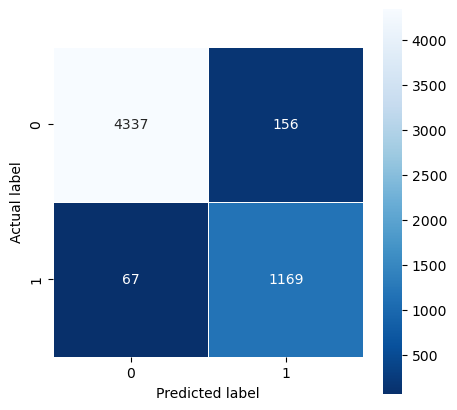

In [57]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


In [60]:
db.head()

,DOMINIO,T_INSTRUM,POBT,POBP,POB_E_A,POB_L_A,VTOT_A,VTOT_12M,VFIS_A,VFIS_12M,...,VFAM,EDAD,NIV,P2_10,P2_16,P2_9,PAREN,P6_1_2,P6_1_4,Target
10417,U,B1,1,1,1,1,1,2,1,2,...,2,57,10.0,3.0,2.0,2.0,1,3,3,0
79033,U,A1,1,1,1,1,2,2,2,2,...,2,32,2.0,8.0,1.0,2.0,2,3,3,0
28666,U,C2,1,0,1,1,1,2,2,2,...,2,32,4.0,3.0,6.0,2.0,3,3,3,0
41063,U,B1,1,1,1,1,1,2,1,2,...,2,74,4.0,3.0,3.0,2.0,1,3,3,0
63836,U,A1,1,1,1,1,1,2,2,2,...,2,51,2.0,3.0,1.0,2.0,2,3,2,0


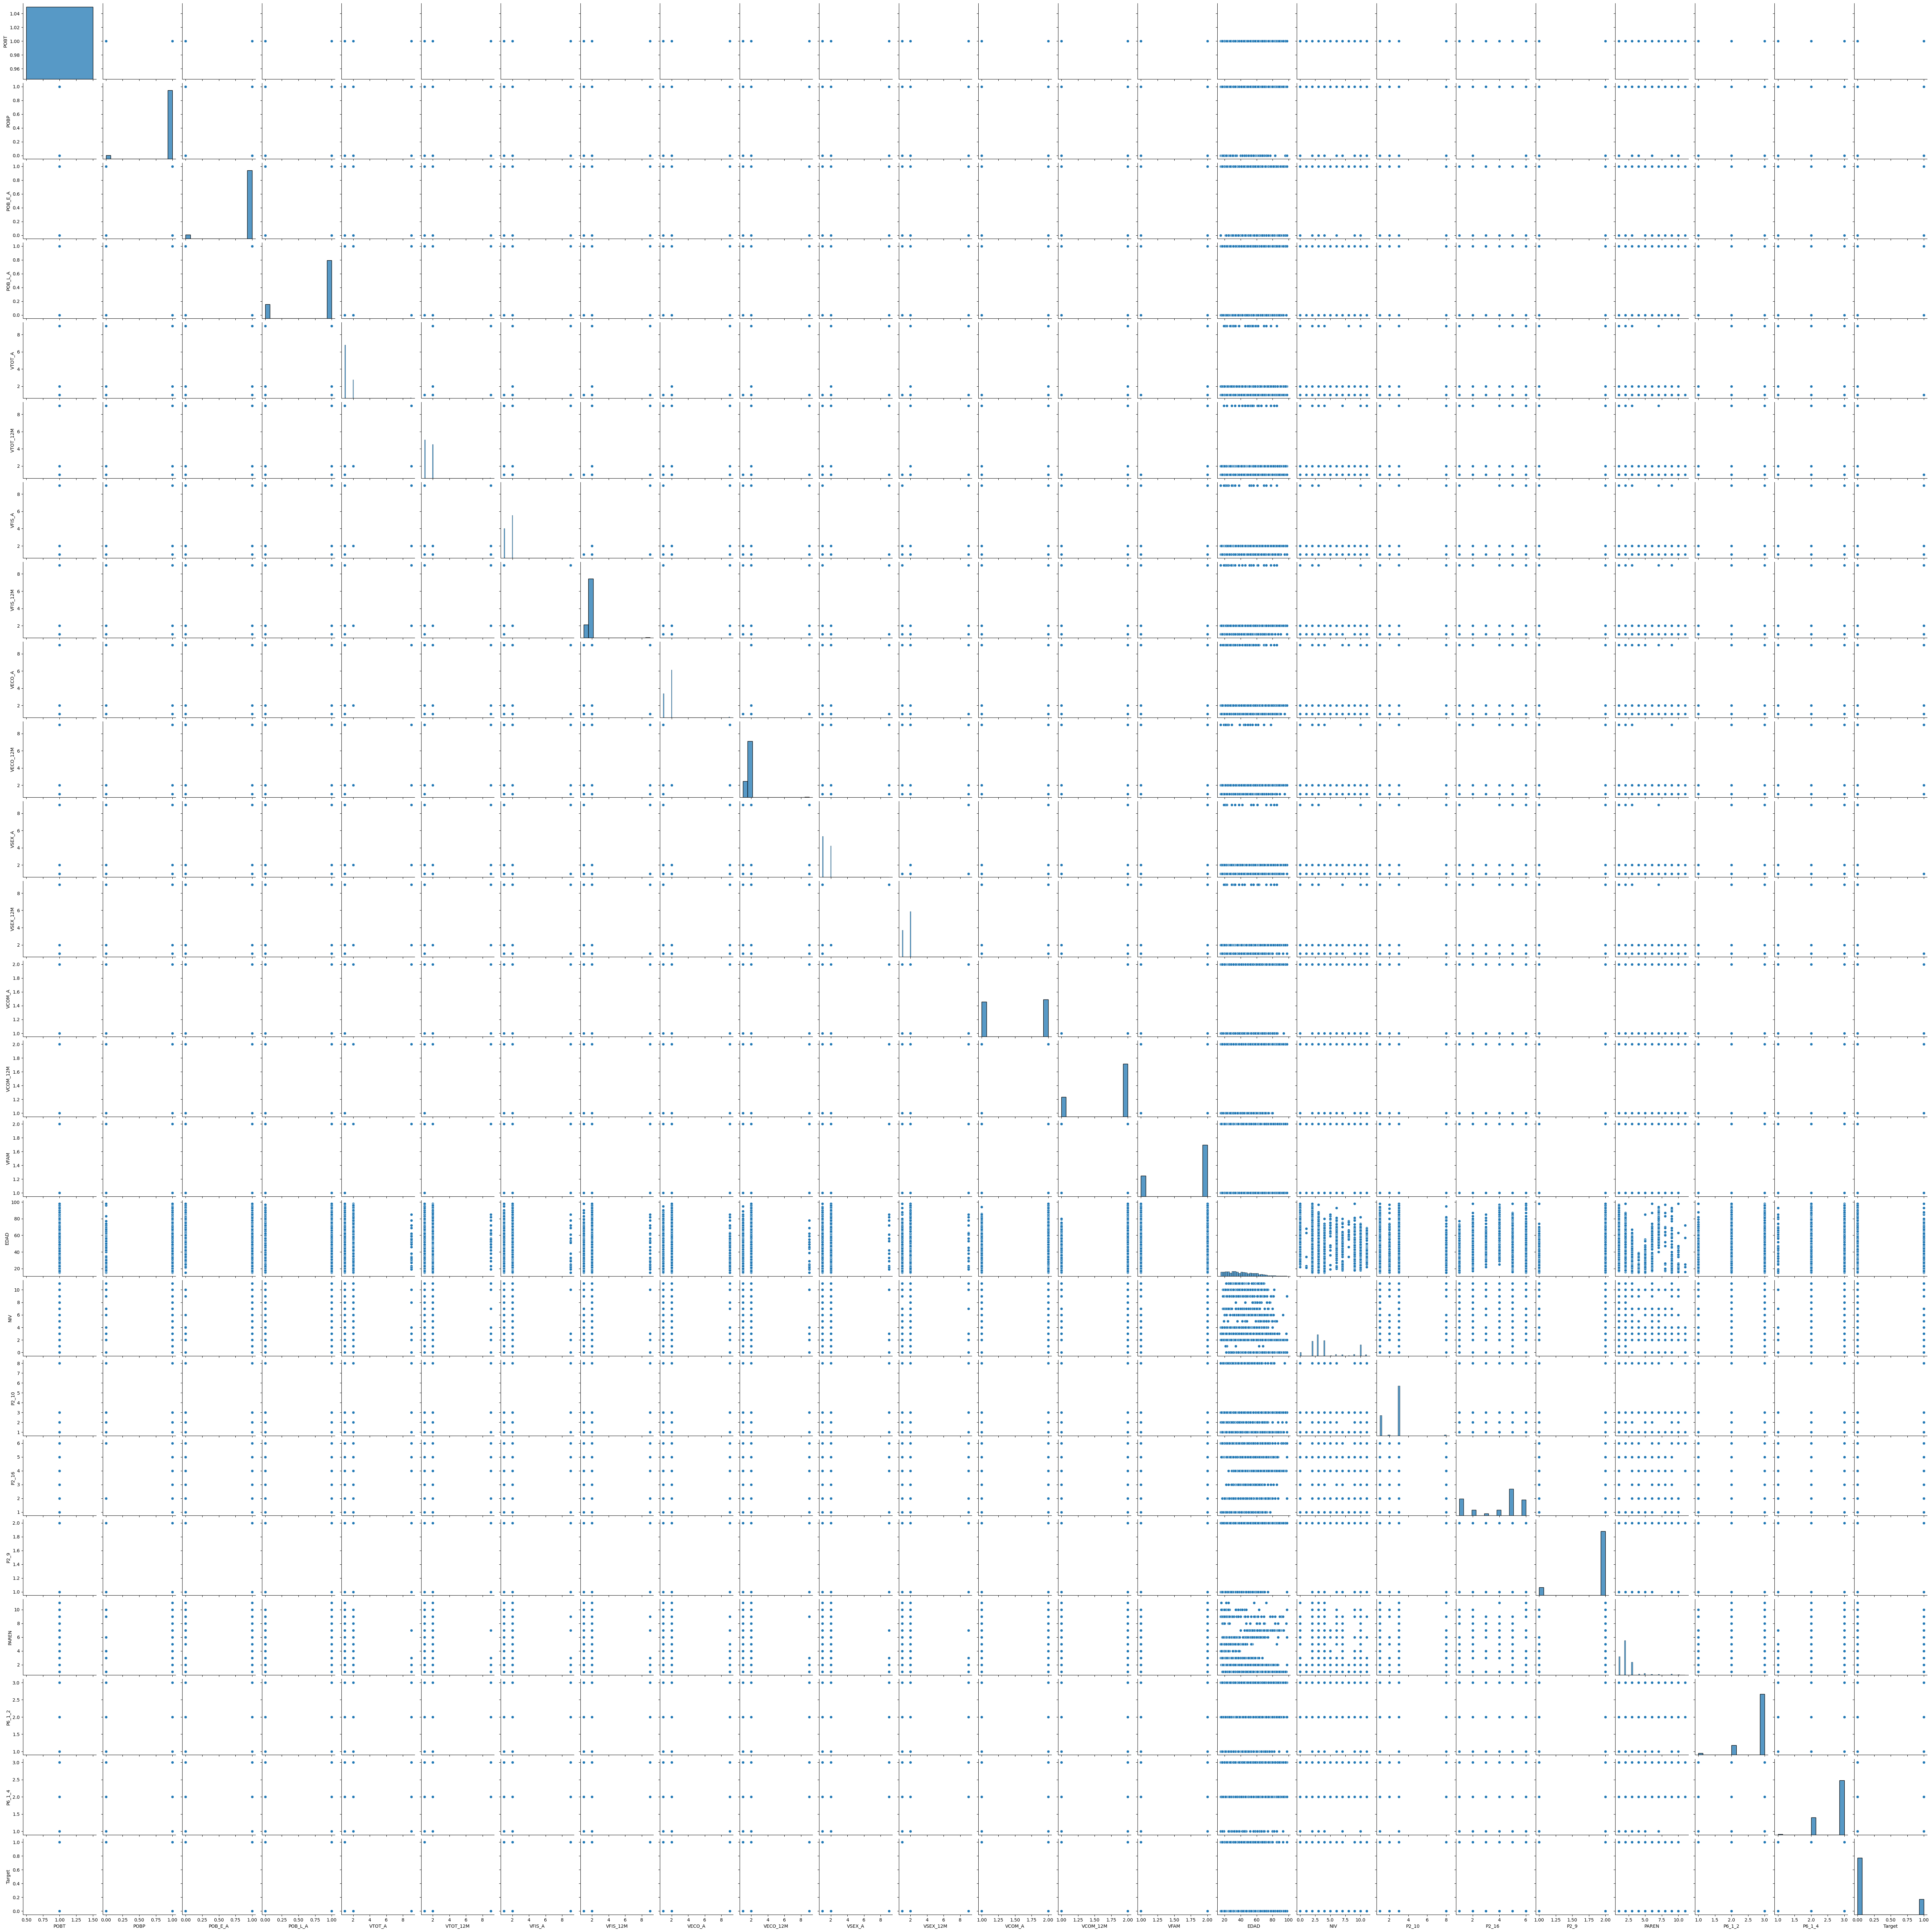

In [71]:
sns.pairplot(db.select_dtypes(include=[np.number]), diag_kind="hist")